# Introduction

Source: https://www.kaggle.com/code/abdallahsaadelgendy/diabetes-prediction-eda-preprocessing-models/notebook

The dataset originally has **330 features (columns)** but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean **BRFSS** data into a **useable format for machine learning alogrithms**. 
__________________________________________________________________________________________________________________________

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )
___________________________________________________________________________________________________________________________

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

_________________________________________________________________________________________________________________________

In [60]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix, classification_report

# replace  plot_roc_curve with RocCurveDisplay
from sklearn.metrics import RocCurveDisplay


from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

________________________________________________________________________________________________________________

# Data Exploring 

______________________________________________________________________________________________________________________

In [61]:
Orginal_data = pd.read_csv("../../data/diabetes_012_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

Orginal_data['Diabetes_binary'] = Orginal_data['Diabetes_012'].apply(lambda x: 0 if x==0 else 1)
Orginal_data.drop(columns=['Diabetes_012'], inplace=True)

data = Orginal_data.copy()

__________________________________________________________________________________________________________________

## Dataset Report

In [62]:
profile = ProfileReport(data)

In [63]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
data.shape 

(253680, 22)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [66]:
data.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0           0.0     0.0      1.0  ...          0.0      5.0      18.0   
1           1.0     0.0      0.0  ...          1.0      3.0       0.0   
2           0.0     1.0      0.0  ...          1.0      5.0      30.0   
3           1.0     1.0      1.0  ...          0.0      2.0       0.0   
4           1.0     1.0      1.0  ...          0.0      2.0       3.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes_binary  
0      15.0       1.0  0.0   9.0        4.0     3.0                0  
1       0.0       0.0  0.0   7.0        6.0     1.0                0  
2      30.0       1.0  0.0   9.0        4.0     8.0                0  
3       0.0       0.0  0.0  11.0        3.0     6.0                0  
4       0.0       0.0  0.0  11.0        5.0     4.0                0  

[5 rows x 22 columns]

In [67]:
data.describe()

HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       1.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  ...    NoDocbcCost        GenHlth  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.634256       0.811420  ...       0.084177       2.511392   
std         0.481639       0.391175  ...       0.277654       1.068477   
min         0.000000       0.000000  ...       0.000000       1.000000   
25%         0.000000       1.000000  ...       0.000000       2.000000   
50%         1.000000       1.000000  ...       0.000000       2.000000   
75%         1.000000       1.000000  ...       0.000000       3.000000   
max         1.000000       1.000000  ...       1.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        3.184772       4.242081       0.168224       0.440342   
std         7.412847       8.717951       0.374066       0.496429   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       3.000000       0.000000       1.000000   
max        30.000000      30.000000       1.000000       1.000000   

                 Age      Education         Income  Diabetes_binary  
count  253680.000000  253680.000000  253680.000000    253680.000000  
mean        8.032119       5.050434       6.053875         0.157588  
std         3.054220       0.985774       2.071148         0.364355  
min         1.000000       1.000000       1.000000         0.000000  
25%         6.000000       4.000000       5.000000         0.000000  
50%         8.000000       5.000000       7.000000         0.000000  
75%        10.000000       6.000000       8.000000         0.000000  
max        13.000000       6.000000       8.000000         1.000000  

[8 rows x 22 columns]

_____________________________________________________________________________________________________________________________

# Preprocessing

___________________________________________________________________________________________________________________

In [68]:
#Transform the data to integer

In [69]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

**Check null values**

In [71]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

**checking unique values in different variables**

In [72]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8
Diabetes_binary                        2

In [73]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [74]:
v_counts(data)

HighBP
0    144851
1    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    146089
1    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    244210
0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
86        1
91        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    141257
1    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    243388
1     10292
Name: count, dtype: int64
_____________________________________________________________________________
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int

_______________________________________________________________________________________________________

**Check The Outliers**

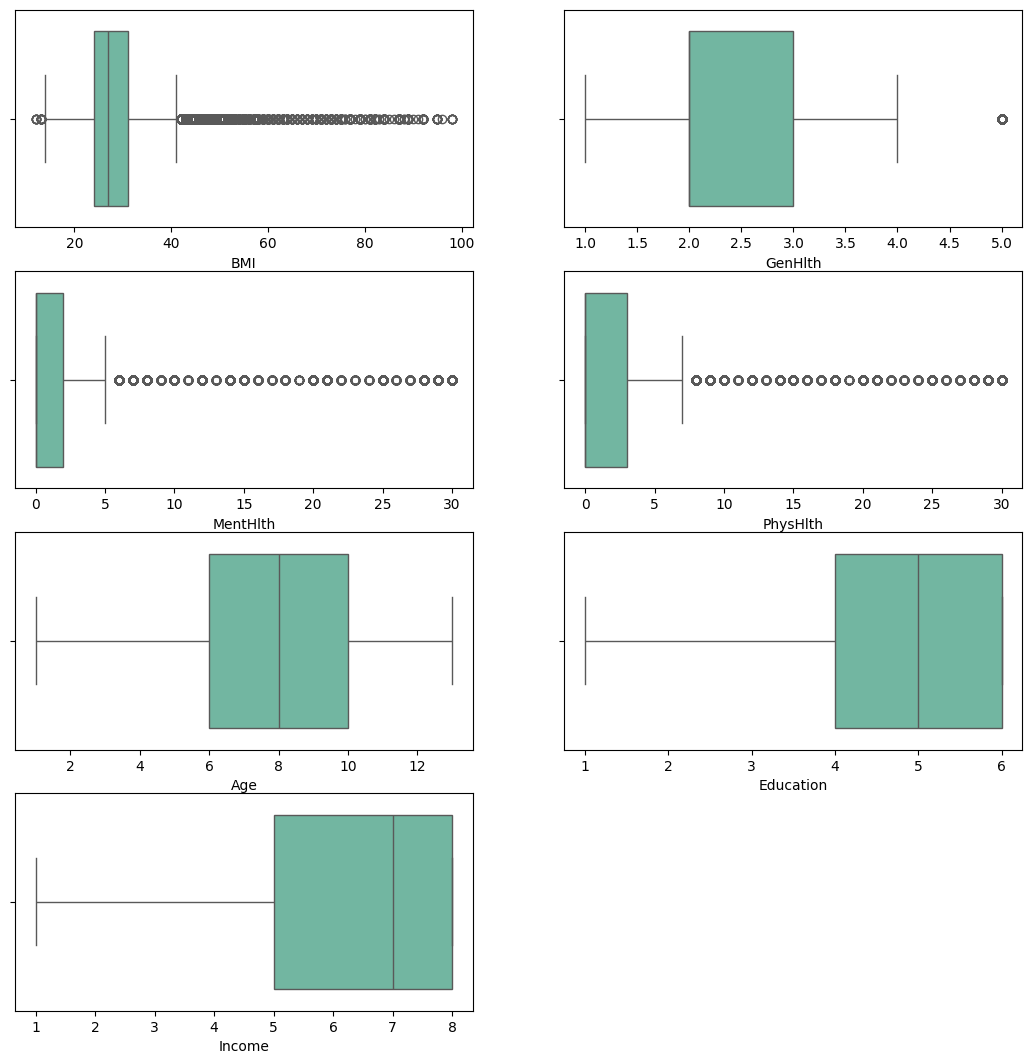

In [75]:
plt.figure(figsize = (13,13))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

there is no outlayers in our data 

_____________________________________________________________________________________________________

**Check and drop dublicated data**

In [76]:
data.duplicated().sum()

np.int64(23968)

In [77]:
data.drop_duplicates(inplace = True)

In [78]:
data.duplicated().sum()

np.int64(0)

In [79]:
data.shape

(229712, 22)

_____________________________________________________________________________________________________________________

**Some codes that help us in our EDA**

In [80]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

In [81]:
#help us to show the categorical variable 
data2 = data.copy() 

In [82]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

___________________________________________________________________________________________________________________________

# EDA

_____________________________________________________________________________________________________________________

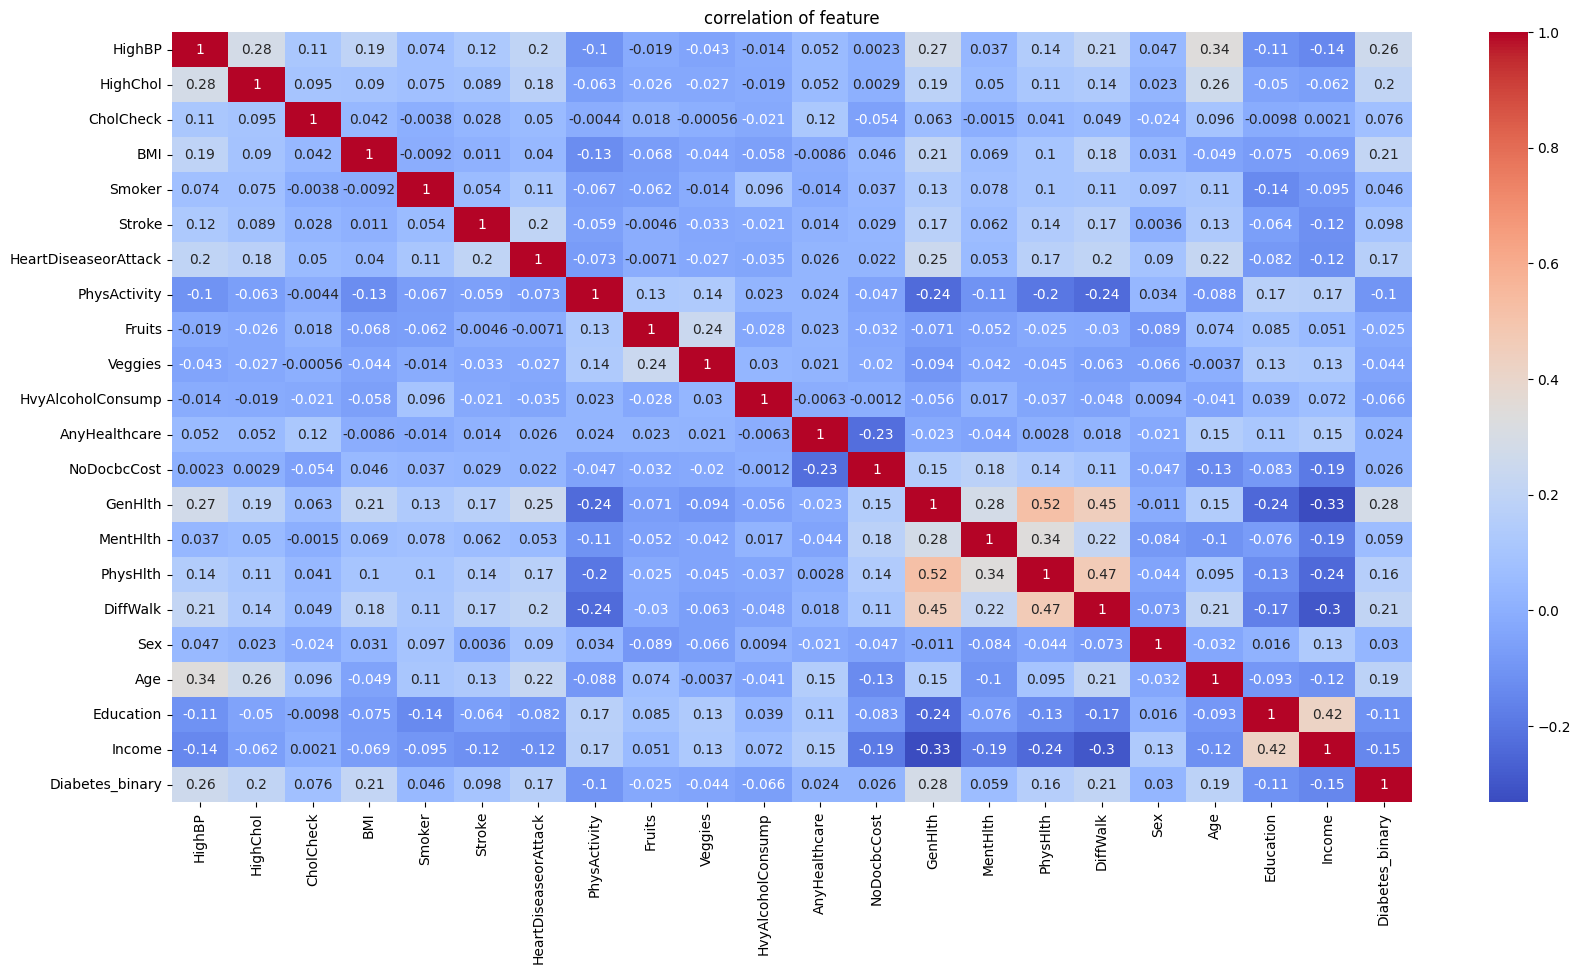

In [83]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize = (20,10))
num_data = data.drop(columns=['Diabetes_binary_str'])
sns.heatmap(num_data.corr(),annot=True, cmap ='coolwarm')
plt.title("correlation of feature");

Correlation heatmap show relation between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => **positive relation**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => **Nagative relation**

__________________________________________________________________________________________________________________

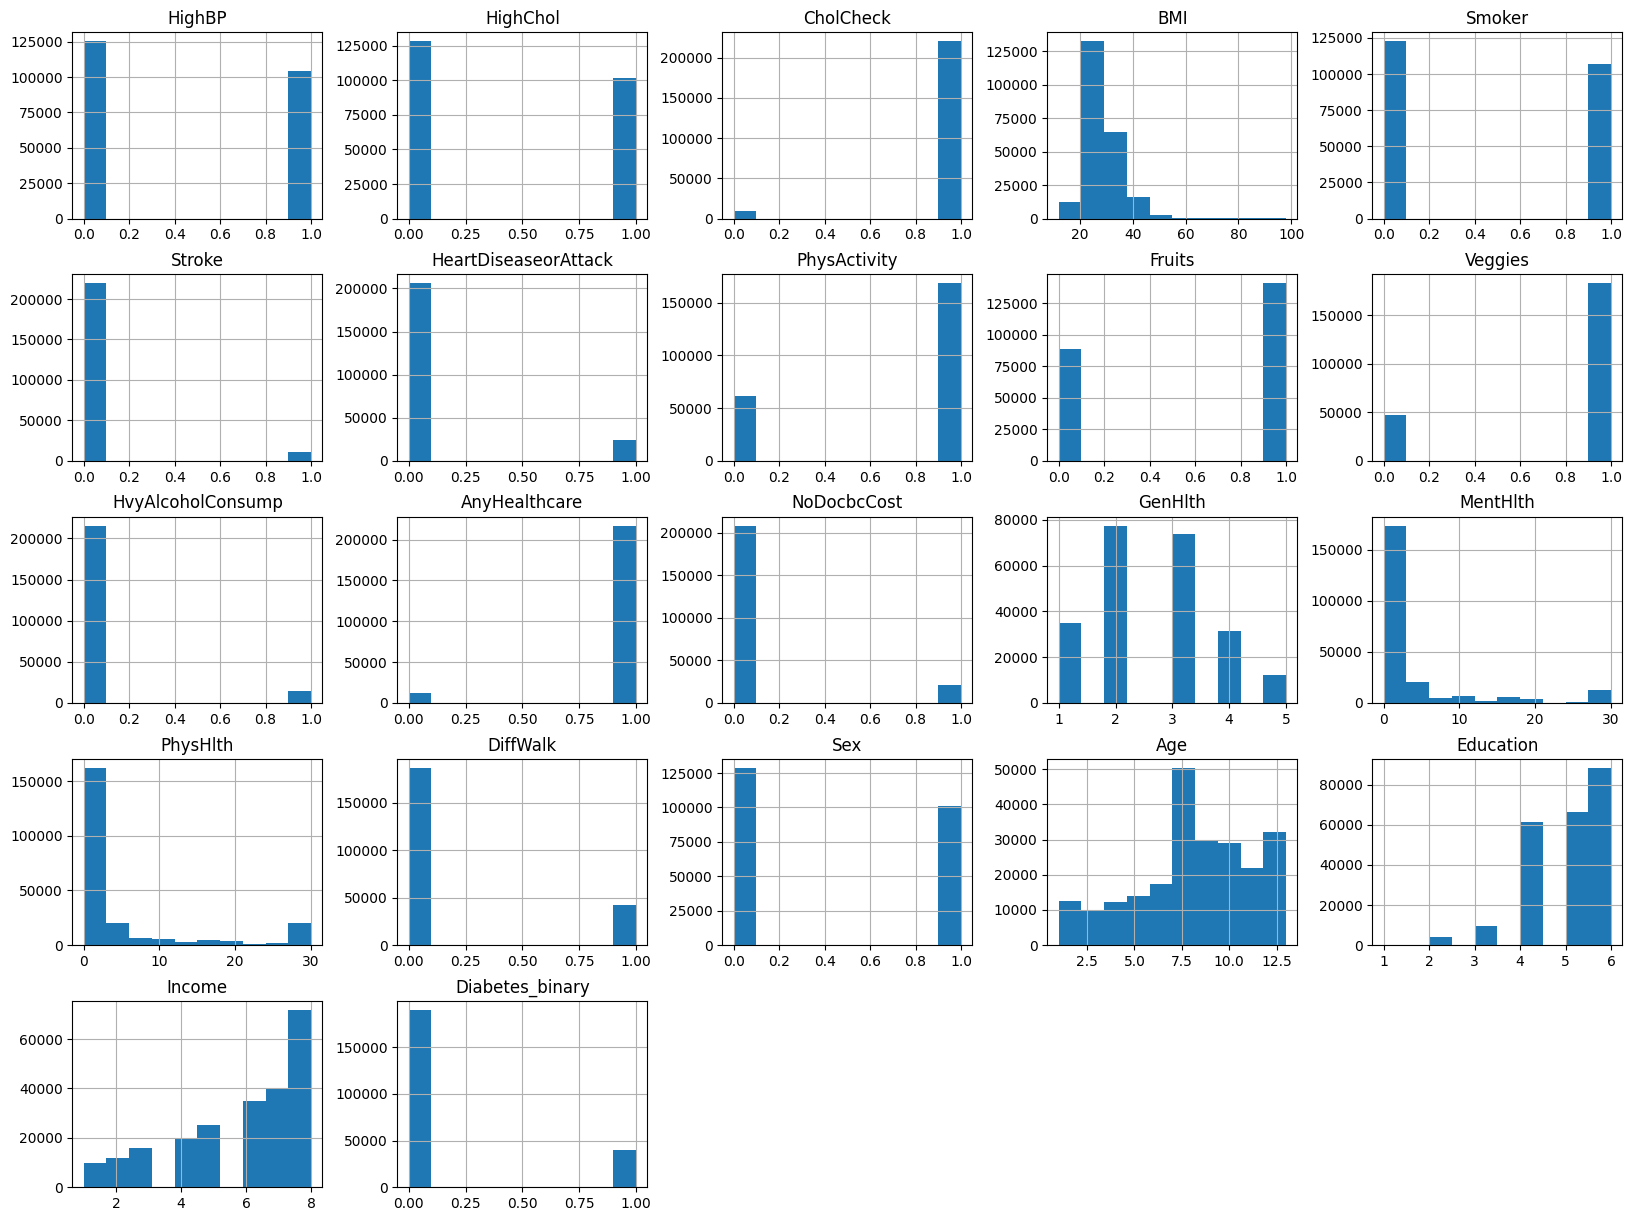

In [31]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

____________________________________________________________________________________________________________________

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [32]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [33]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
                    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

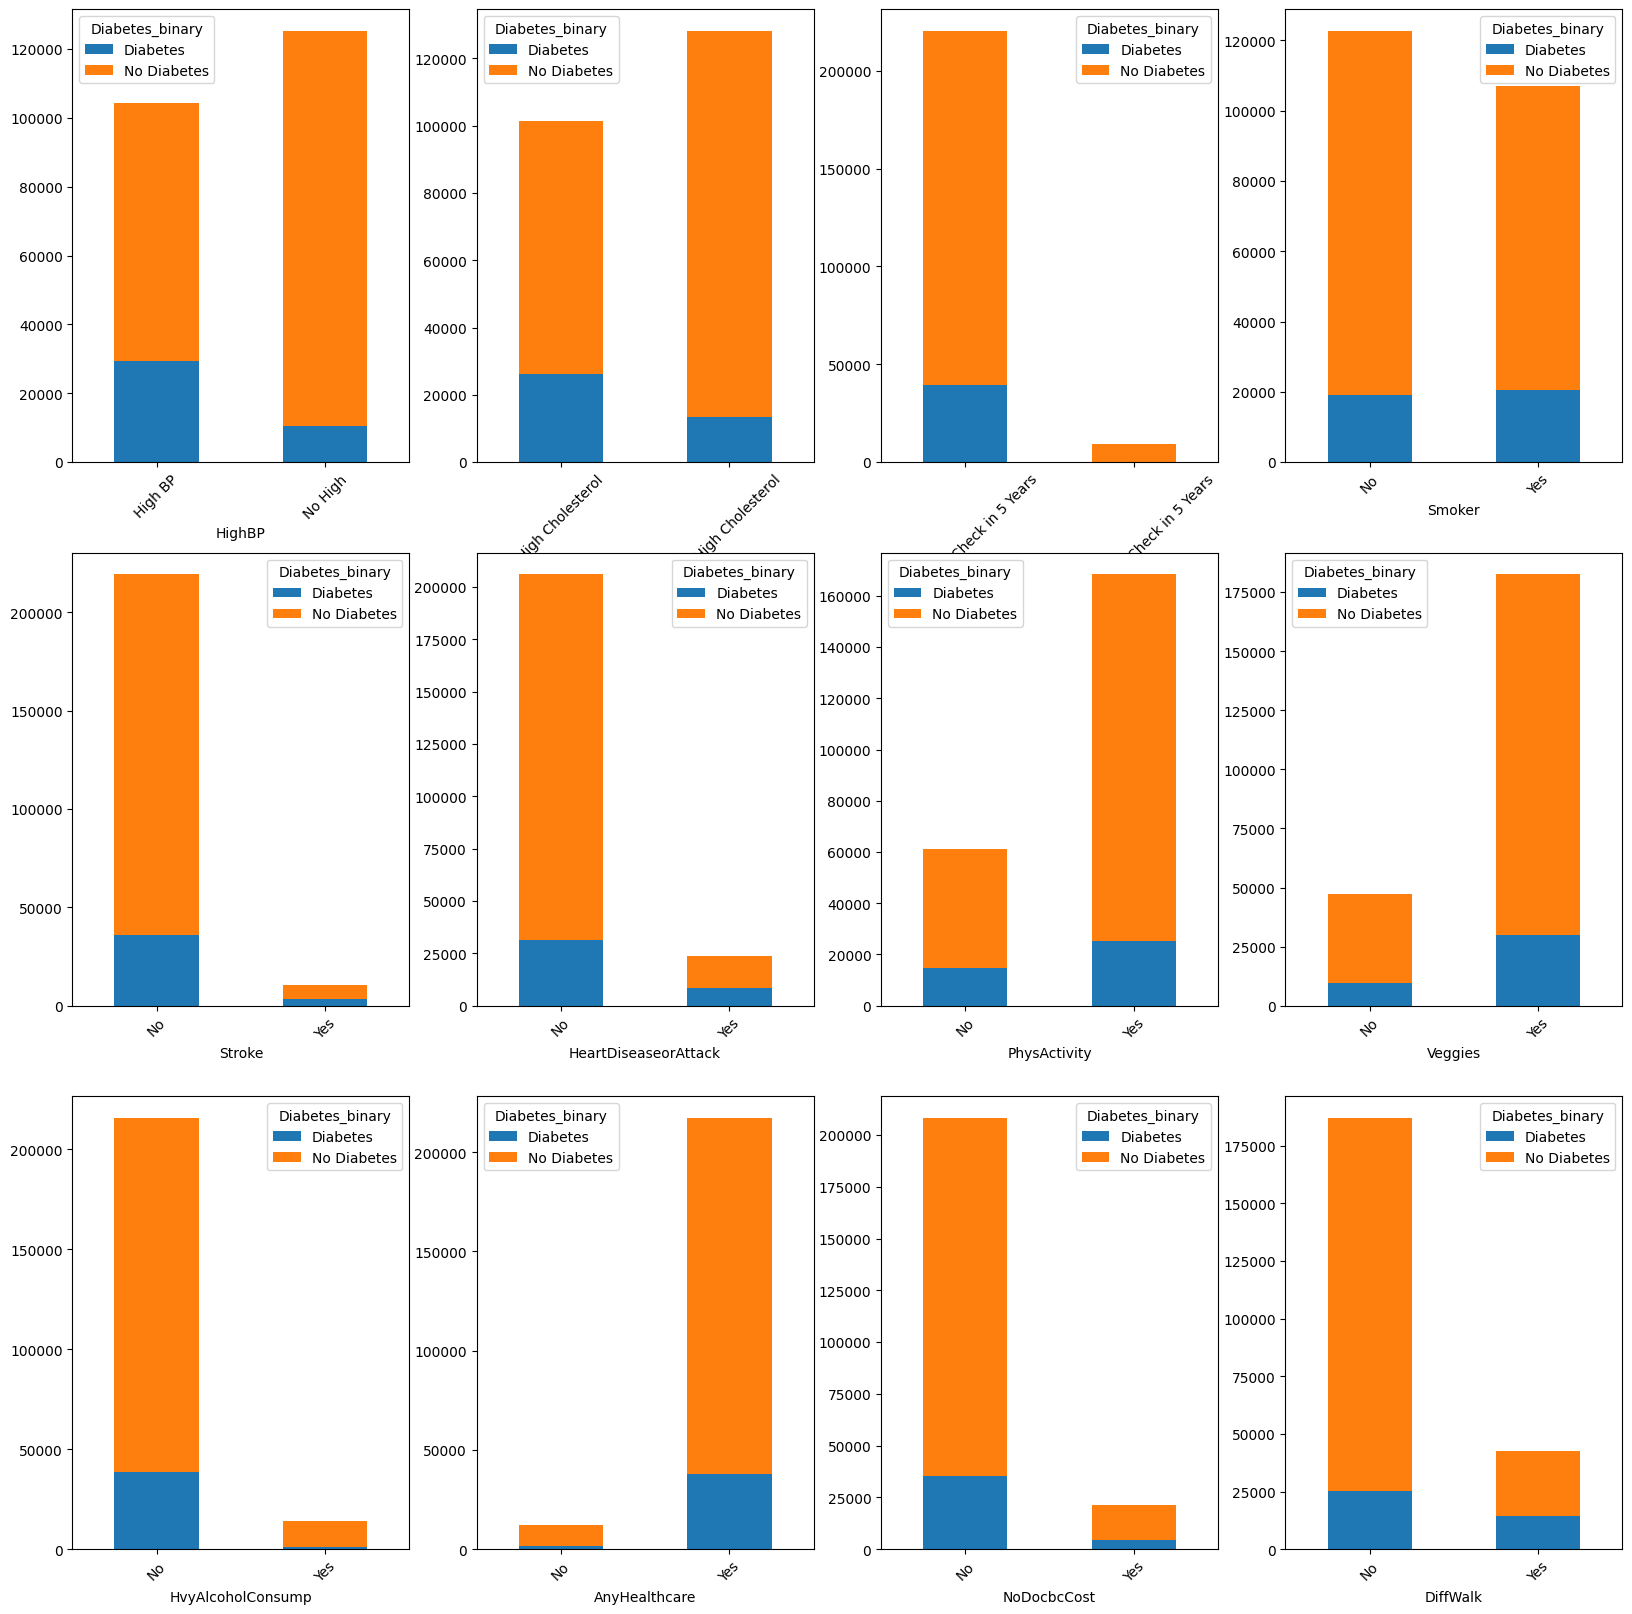

In [34]:
n_cols = len(cols)

fig, ax = plt.subplots(math.ceil(n_cols/4), 4, figsize=(20,20))
axe = ax.ravel()



for i in range(n_cols):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i], rot=45)
    axe[i].set_xlabel(cols[i])
    
fig.show()

______________________________________________________________________________________________________________

**Let's view our target values "Diabetes_binary"**

In [35]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    190055
Diabetes        39657
Name: count, dtype: int64

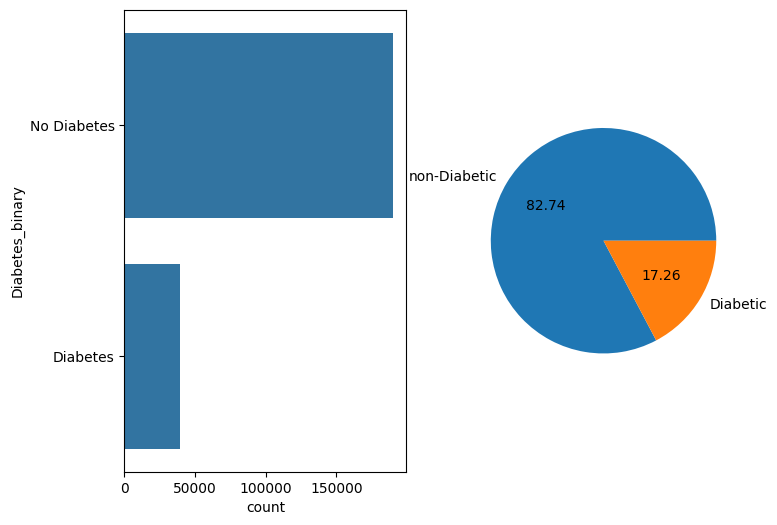

In [36]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(8,6))

sns.countplot(data2['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );


We can see that healthy people is more than people with diabetes 

_____________________________________________________________________________________________________________________

**The feature "Age" and it's relation with the target**

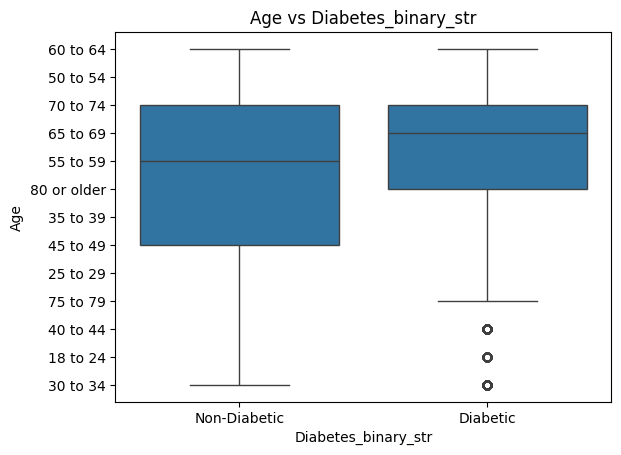

In [37]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data2)
plt.title('Age vs Diabetes_binary_str')
plt.show()

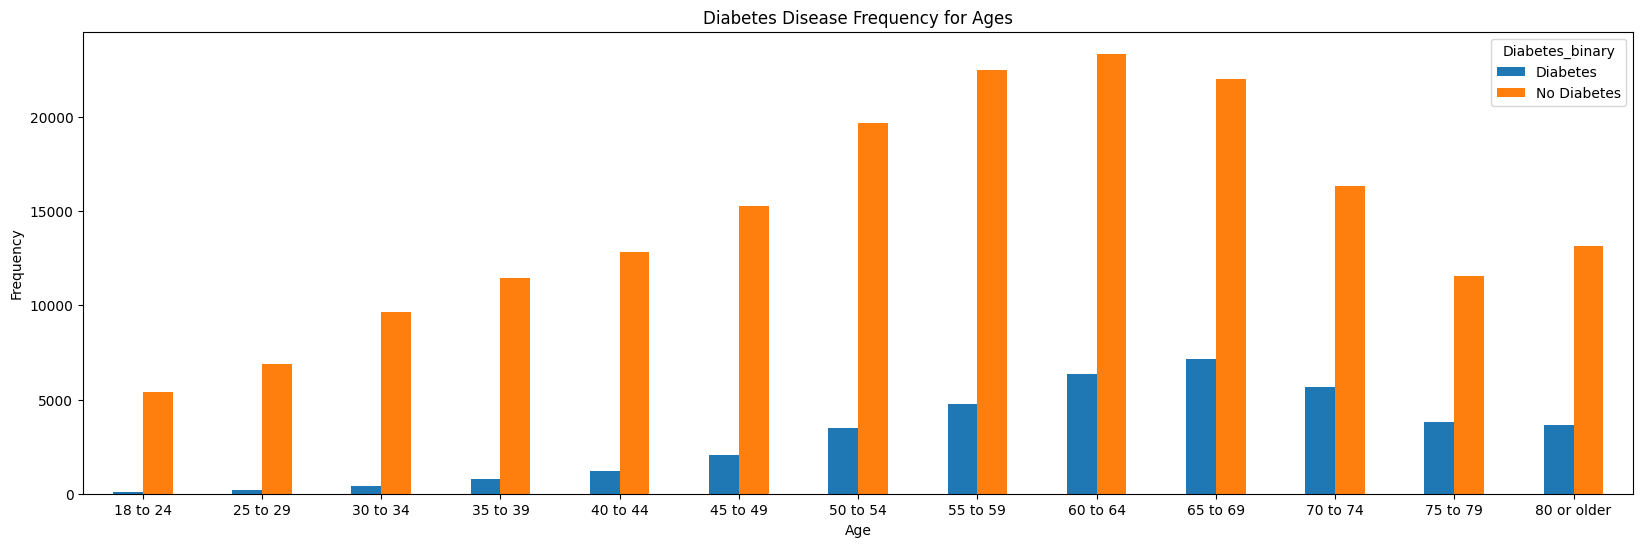

In [38]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

______________________________________________________________________________________________________________________

**The feature "Education" and it's relation with the target**

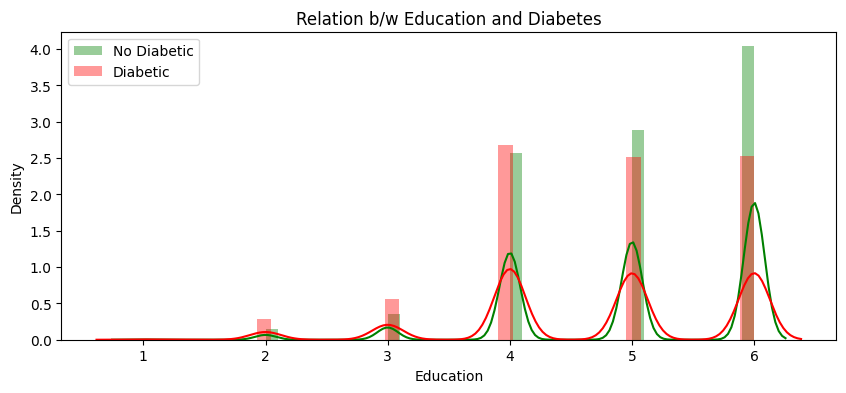

In [39]:
plt.figure(figsize=(10,4))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="g", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend();

We can see that most of people have high education and in the high level of education , the healthy people is more than others

_____________________________________________________________________________________________________________________

**The feature "income" and it's relation with the target**

<Figure size 1000x500 with 0 Axes>

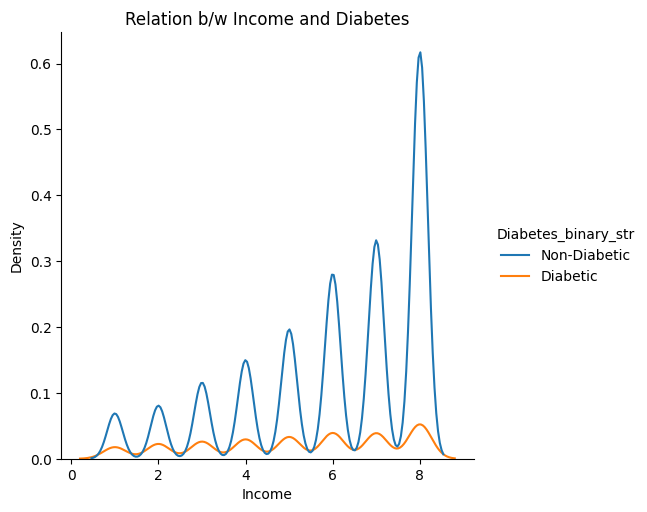

In [40]:
plt.figure(figsize=(10,5))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
# sns.histplot(data=data, x="Income", hue="Diabetes_binary_str", kde=True, stat='density')

plt.title("Relation b/w Income and Diabetes");

We can see that most of people have high income and in the high level of income , the healthy people is more than others

______________________________________________________________________________________________________________________

**The feature "BMI" and it's relation with the target**

In [44]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

# plt.figure(figsize=(15, 7))

# sns.countplot(data.BMI[data.Diabetes_binary == 0], color="r", label="No Diabetic")
# sns.countplot(data.BMI[data.Diabetes_binary == 1], color="g", label="Diabetic")
# plt.title("Relation b/w BMI and Diabetes")

# plt.legend()

As we can see people range between 24-33 BMI have more likely to have Diabetic.

________________________________________________________________________________________________________________________

**The feature "MentHlth" and it's relation with the target**

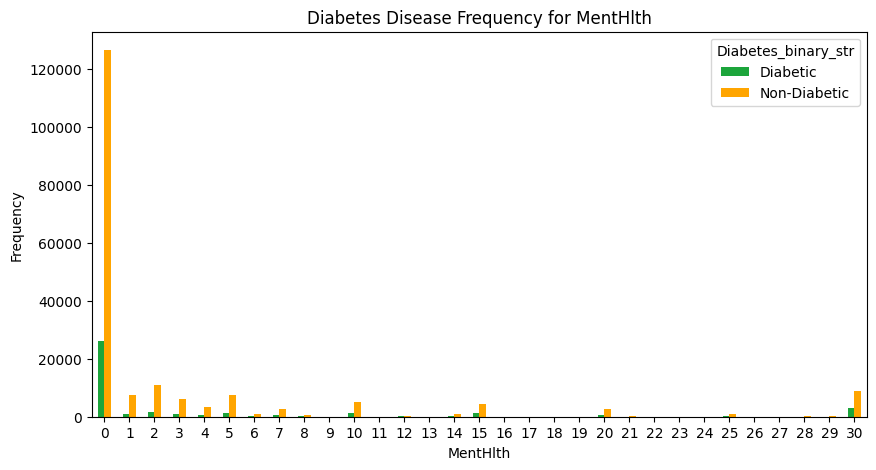

In [42]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(10,5),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

____________________________________________________________________________________________________________________

**The feature "PhysHlth" and it's relation with the target**

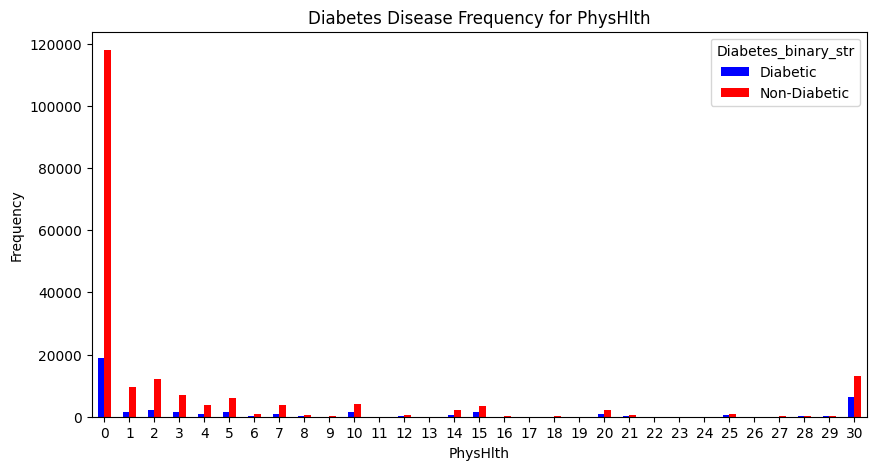

In [43]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(10,5),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

______________________________________________________________________________________________________________________

**The feature "GenHlth" and it's relation with the target**

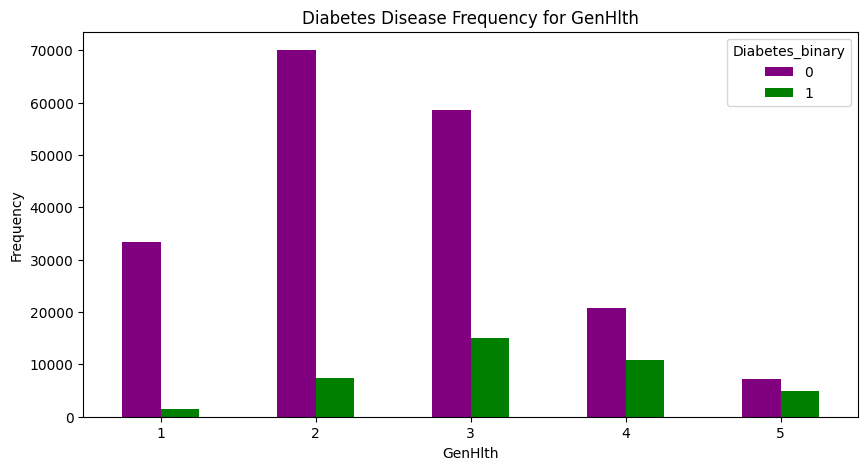

In [45]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(10,5),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth  ,but they have diabetes !!!

_________________________________________________________________________________________________________________

# Feature Selections

__________________________________________________________________________________________________________________

**With correlation**

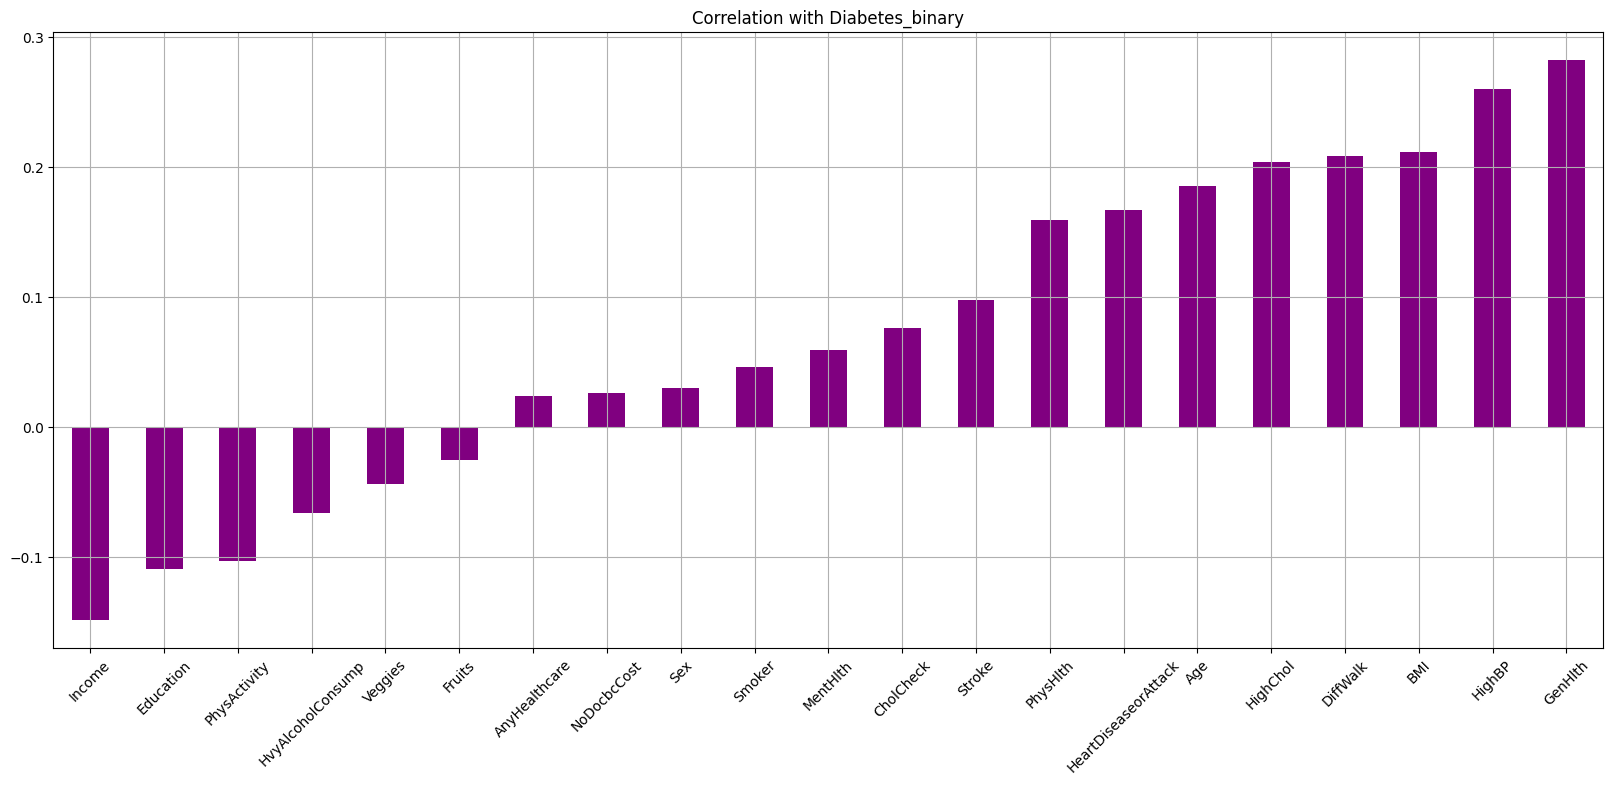

In [46]:
tmp = data.drop(['Diabetes_binary', 'Diabetes_binary_str'], axis=1).corrwith(data.Diabetes_binary).sort_values()
tmp.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple", rot=45);

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

_______________________________________________________________________________________________________________________________

**VIF Test**

In [47]:


def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds.sort_values(ascending=False))

const                   116.870072
GenHlth                   1.822786
PhysHlth                  1.623289
DiffWalk                  1.536380
Income                    1.506109
Age                       1.356384
HighBP                    1.344924
Education                 1.326579
MentHlth                  1.239391
Diabetes_binary           1.206718
HighChol                  1.182453
HeartDiseaseorAttack      1.175252
BMI                       1.162276
PhysActivity              1.157390
NoDocbcCost               1.144159
AnyHealthcare             1.113187
Fruits                    1.112539
Veggies                   1.112404
Smoker                    1.091888
Stroke                    1.081473
Sex                       1.075716
CholCheck                 1.033651
HvyAlcoholConsump         1.025346
dtype: float64


___________________________________________________________________________________________________

**ANOVA Test**

In [48]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [49]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [50]:
pd.DataFrame(X_selected).head(3)

0     1    2    3     4    5    6    7    8    9
0  1.0  40.0  0.0  5.0  15.0  1.0  9.0  4.0  3.0  0.0
1  0.0  25.0  0.0  3.0   0.0  0.0  7.0  6.0  1.0  0.0
2  1.0  28.0  0.0  5.0  30.0  1.0  9.0  4.0  8.0  0.0

________________________________________________________________________________________________________________

**Chi Square**

In [51]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores.sort_values('Score')

Feature          Score
9      HvyAlcoholConsump       3.776531
10         AnyHealthcare      18.333239
11           NoDocbcCost      69.999729
1              CholCheck      91.895741
7                 Fruits     152.596731
8                Veggies     179.565744
16                   Sex     386.959613
6           PhysActivity     969.124813
18             Education     975.328914
3                 Smoker    1328.853288
4                 Stroke    4086.401304
19                Income    5270.552064
5   HeartDiseaseorAttack   10072.050564
12               GenHlth   10415.382008
15              DiffWalk   10551.351086
0               HighChol   12990.645791
13              MentHlth   13950.671636
20       Diabetes_binary   15617.531938
2                    BMI   17834.949293
17                   Age   34955.328009
14              PhysHlth  118120.942349

In [52]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
14              PhysHlth  118120.942349
17                   Age   34955.328009
2                    BMI   17834.949293
20       Diabetes_binary   15617.531938
13              MentHlth   13950.671636
0               HighChol   12990.645791
15              DiffWalk   10551.351086
12               GenHlth   10415.382008
5   HeartDiseaseorAttack   10072.050564
19                Income    5270.552064
4                 Stroke    4086.401304
3                 Smoker    1328.853288
18             Education     975.328914
6           PhysActivity     969.124813
16                   Sex     386.959613
8                Veggies     179.565744


In [53]:
#there are the features which we will use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us 

In [84]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [85]:
data.drop(colomns , axis= 1 ,inplace=True)

________________________________________________________________________________________________________________________

# Data Splitting 

In [87]:
X=data.drop(["Diabetes_binary"],axis=1)
Y=data["Diabetes_binary"]

______________________________________________________________________________________________________

# Dealing with imbalancing

Doaa note: this doesn't look right. We are only selecting similar samples to the other group?

In [88]:
Y.value_counts()

Diabetes_binary
0    190055
1     39657
Name: count, dtype: int64

In [89]:
nm = NearMiss(version=1, n_neighbors=3)

x_sm,y_sm = nm.fit_resample(X,Y)

print(y_sm.shape , x_sm.shape)
print(y_sm.value_counts())

(79314,) (79314, 16)
Diabetes_binary
0    39657
1    39657
Name: count, dtype: int64


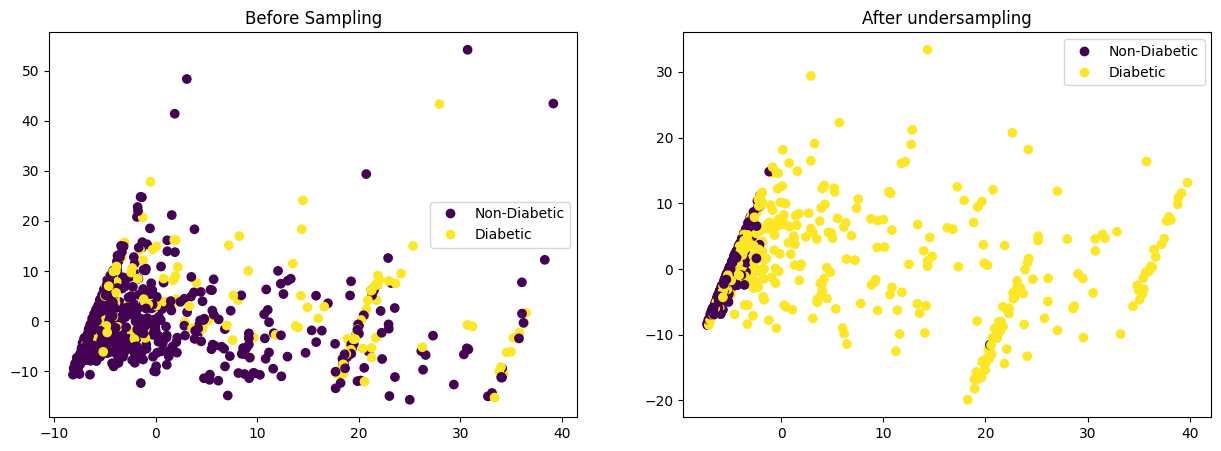

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
axe = ax.ravel()


def plot_pca(x_all, y_all, ax, title=""):
    tmp = pd.concat([x_all, y_all], axis=1).sample(1000)
    x = tmp.drop(columns=['Diabetes_binary'])
    y = tmp['Diabetes_binary']
    
    pca = PCA()
    Xt = pca.fit_transform(x)
    plot = ax.scatter(Xt[:,0], Xt[:,1], c=y)
    ax.set(title=title)
    ax.legend(handles=plot.legend_elements()[0], labels=list(data2['Diabetes_binary_str'].unique()));

plot_pca(X, Y, ax=axe[0], title="Before Sampling")
plot_pca(x_sm, y_sm, ax=axe[1], title="After undersampling")

In [104]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

_______________________________________________________________________________________________________________________

# Data Scalling

In [105]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

_________________________________________________________________________________________________________________

# Modeling

____________________________________________________________________________________________________

**Logistic**

In [106]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [107]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8240
Test set score: 0.8241


In [108]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1758772851439378
Root Mean Squared Error : 0.41937725873482673


In [109]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.89      0.84     11879
           1       0.88      0.76      0.81     11916

    accuracy                           0.82     23795
   macro avg       0.83      0.82      0.82     23795
weighted avg       0.83      0.82      0.82     23795



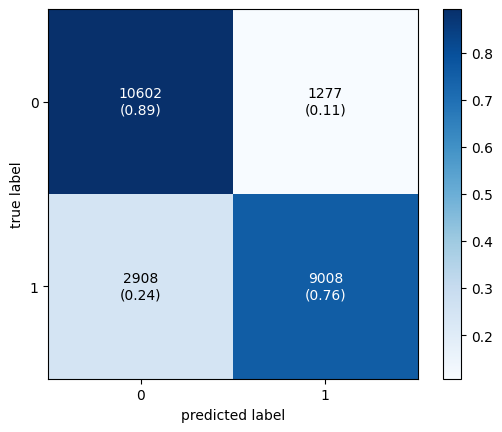

In [110]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Desicion Tree model**

In [111]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [112]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8452
Test set score: 0.8242


In [113]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.17579323387266232
Root Mean Squared Error : 0.4192770371397202


In [114]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     11879
           1       0.91      0.72      0.80     11916

    accuracy                           0.82     23795
   macro avg       0.84      0.82      0.82     23795
weighted avg       0.84      0.82      0.82     23795



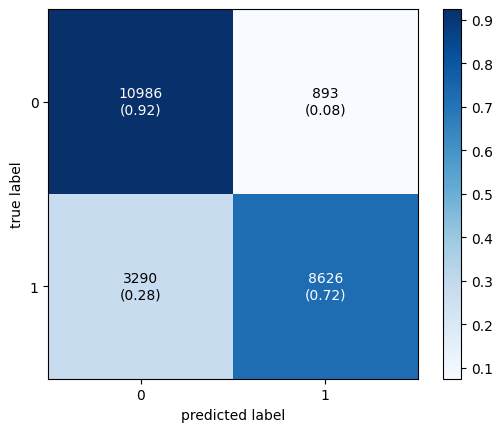

In [115]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**KNN**

In [116]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [117]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8294
Test set score: 0.7889


In [118]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.21105274217272535
Root Mean Squared Error : 0.4594047694274901


In [119]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81     11879
           1       0.89      0.66      0.76     11916

    accuracy                           0.79     23795
   macro avg       0.81      0.79      0.79     23795
weighted avg       0.81      0.79      0.79     23795



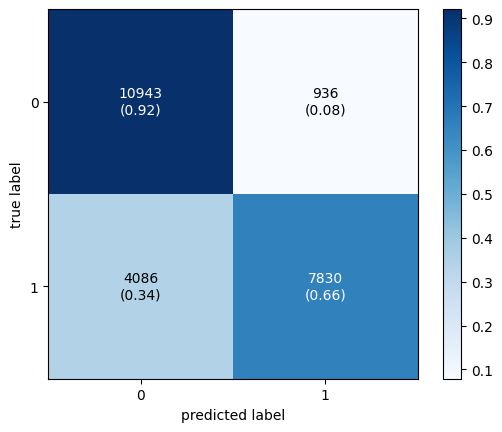

In [120]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Rondom Forest**

In [121]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [122]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8504
Test set score: 0.8367


In [123]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.16331162008825384
Root Mean Squared Error : 0.40411832436583944


In [124]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     11879
           1       0.91      0.75      0.82     11916

    accuracy                           0.84     23795
   macro avg       0.85      0.84      0.84     23795
weighted avg       0.85      0.84      0.84     23795



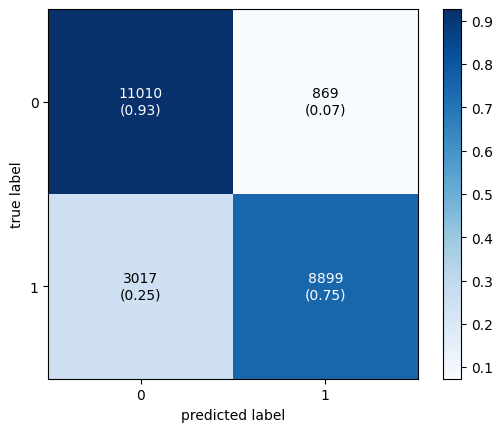

In [125]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**SVM**

In [126]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8438
Test set score: 0.8405


In [127]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.15948728724521957
Root Mean Squared Error : 0.3993585948057454


In [164]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



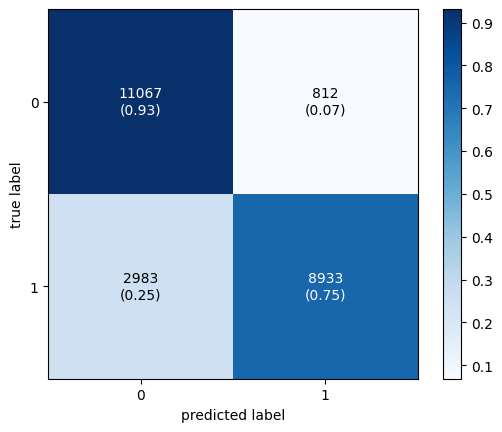

In [128]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**XGBoost**

In [129]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [167]:
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8770
Test set score: 0.8663


In [168]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13367206420057934
Root Mean Squared Error : 0.3656119038004361


In [169]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     10468
           1       0.94      0.79      0.86     10591

    accuracy                           0.87     21059
   macro avg       0.88      0.87      0.87     21059
weighted avg       0.88      0.87      0.87     21059



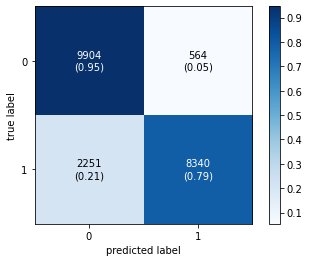

In [170]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()